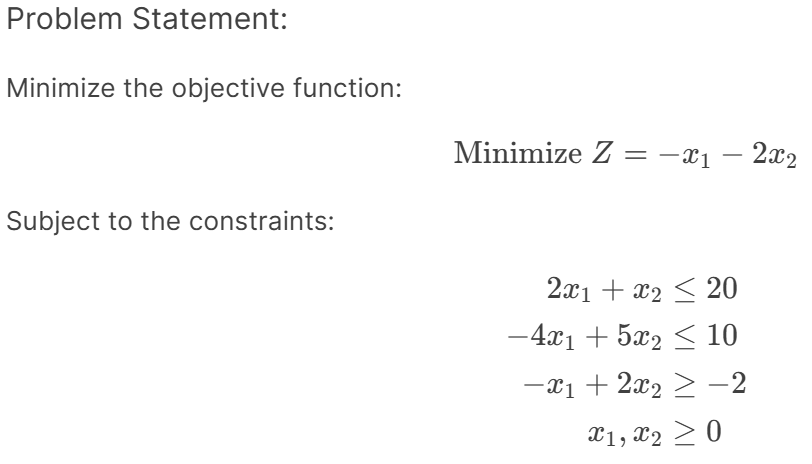

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function
c = [-1, -2]  # We want to minimize -x1 - 2x2

# Coefficients of the inequality constraints (left-hand side)
A = [
    [2, 1],   # 2x1 + x2 <= 20
    [-4, 5],  # -4x1 + 5x2 <= 10
    [1, -2]   # -x1 + 2x2 >= -2  (multiplied by -1 to convert to <= form)
]

# Right-hand side of the inequality constraints
b = [20, 10, 2]


# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, method='highs')

# Display the results
if result.success:
    print(f"Optimal value: {result.fun}")
    print(f"Optimal solution: x1 = {result.x[0]}, x2 = {result.x[1]}")
else:
    print("No solution found.")

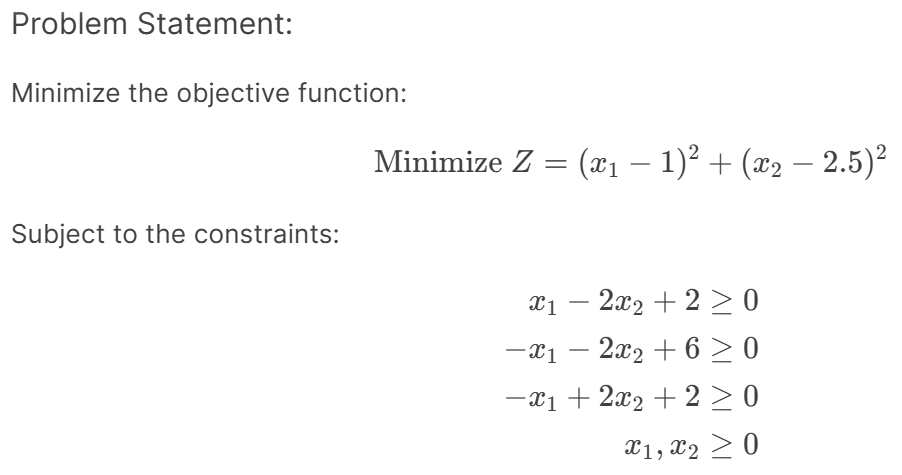

In [10]:
from scipy.optimize import minimize

# Define the objective function
def objective(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

# Define the inequality constraints (>= 0 form)
def constraint1(x):
    return x[0] - 2*x[1] + 2  # x1 - 2x2 + 2 >= 0

def constraint2(x):
    return -x[0] - 2*x[1] + 6  # -x1 - 2x2 + 6 >= 0

def constraint3(x):
    return -x[0] + 2*x[1] + 2  # -x1 + 2x2 + 2 >= 0

# Initial guess
x0 = [0, 0]

# Define constraints in the form required by `minimize`
constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'ineq', 'fun': constraint3}
]

# Solve the nonlinear programming problem
result = minimize(objective, x0, method='SLSQP', constraints=constraints)

# Display the results
if result.success:
    print(f"Optimal value: {result.fun}")
    print(f"Optimal solution: x1 = {result.x[0]}, x2 = {result.x[1]}")
else:
    print("No solution found.")

Optimal value: 0.8000000000000028
Optimal solution: x1 = 1.3999999999951172, x2 = 1.6999999999975568


# Calling required Libraries

In [2]:
import matplotlib.pyplot as plt # to plot charts
import numpy as np # mathematics calculation package
import scipy # provide functions for optimization, algebra, etc.
from scipy.optimize import linprog # special part for Linear Programming
from matplotlib.patches import Polygon
%matplotlib inline

# Example 1

# Defining Variables

 x1: number of batches of product 1 produced per week

 x2: number of batches of product 2 produced per week

 Z: total profit per week ( in thousands of dollars) from producing these two products


---


# Objective function
 Maximize Z=3x1+5x2



---
# Constraints
x1 <= 4                 

2x2 <= 12               

3x1+2x2 <= 18
           
X1 , X2 >= 0            



In [ ]:
# x1: number of batches of product 1 produced per week
# x2: number of batches of product 2 produced per week
# Z: total profit per week ( in thousands of dollars) from producing these two products
# Z=3x1+5x2

# Visualization

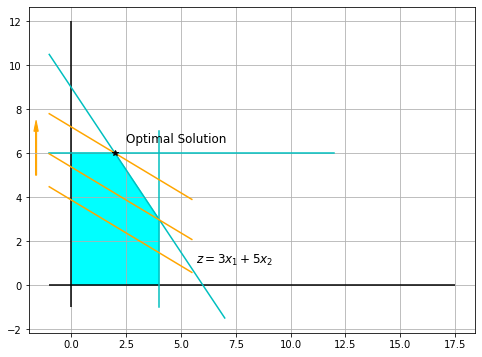

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 7, 100), 9-1.5*np.linspace(-1, 7, 100), color="c")
ax.plot([-1,1,12], [6,6,6], color="c")
ax.plot([4,4,4],[-1,1,7], color="c")


# Draw the feasible region
feasible_region = Polygon(np.array([[0,0],
                                   [0,6],
                                   [2,6],
                                   [4,3],
                                   [4,0]]),
                       color="cyan")
ax.add_patch(feasible_region)

# Draw the objective function
ax.plot(np.linspace(-1, 5.5, 100), 3.875-(3./5.)*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-(3./5.)*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 7.2-(3./5.)*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 5x_2$", size=12)

# Draw the optimal solution
ax.plot(2, 6, "*", color="black")
ax.text(2.5, 6.5, "Optimal Solution", size=12)

plt.show()

In [ ]:
# # x1 > 0
# x1 = np.linspace(0,10,10**5)
# # x1 <= 4
# x2=(-x1*0)+4
# # 2x2<=12
# x3= ((x1*0)+12)/2
# # 3x1+2x2<=18
# x4=(18-3*x1)/2
# # x2 > 0
# x5=(x1*0)
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.grid()
# ax.plot(x2 , x1 , label='x1<=4')
# ax.plot(x1 , x3, label='2x2<=12')
# ax.plot(x1 , x4,label='3x1+2x2<=18')
# ax.plot(x1 , x5, label='x2>0')
# ax.plot(x5,x1,label='x1>=0')
# y1=np.maximum(x3,x4)

# feasible_region=Polygon(np.array([[0,0],
#                                    [0,6],
#                                    [2,6],
#                                    [4,3],
#                                    [4,0]]),color="cyan")
# ax.add_patch(feasible_reagion)
# plt.show()





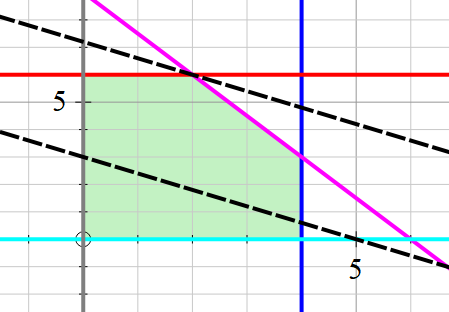

linprog() just solves minimization.Therefore, the sign (+) should be changed to (-) in objective function and instead of having the greater than or equal to sign, you can multiply this inequalities by −1 and get the opposite less than or equal to sign


---
# Objective function


Minimize -Z=-3x1-5x2


---
# constraints
x1 <= 4 (1)

2x2 <= 12 (2)

3x1+2x2 <= 18 (3)

X1 , X2 >= 0 (4,5)

# set input values

In [ ]:
obj=[-3,-5] # coefficient for x1 and x2, respectively (!!!pay attention to signs!!!).

# left hand side coefficents in constraints
LHS_ineq=[[1,0], # 1
          [0,2], # 2
          [3,2]] # 3

# right hand side coefficents in constraints
RHS_ineq=[4,   # 1
          12,  # 2
          18]  # 3


In [ ]:
# defining the bounds for each variable in the same order as the coefficients
bnd = [(0, float("inf")),  # Bounds of x1       math.inf, numpy.inf, or scipy.inf can be used instead of float("inf")
       (0, float("inf"))]  # Bounds of x2

#  linprog() takes these bounds (zero to positive infinity) by default

# Optimizing

In [ ]:
opt = linprog(c=obj, A_ub=LHS_ineq, b_ub=RHS_ineq,
              method="highs")
print(opt)

# con is the equality constraints residuals.
# fun is the objective function value at the optimum (if found).
# message is the status of the solution.
# nit is the number of iterations needed to finish the calculation.
# slack is the values of the slack variables, or the differences between the values of the left and right sides of the constraints.
# status is an integer between 0 and 4 that shows the status of the solution, such as 0 for when the optimal solution has been found.
# success is a Boolean that shows whether the optimal solution has been found.
# x is a NumPy array holding the optimal values of the decision variables.
# after running, the sign of z should be change

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -36.0
       ineqlin:  marginals: array([-0. , -1.5, -1. ])
  residual: array([2., 0., 0.])
         lower:  marginals: <MemoryView of 'ndarray' at 0x7f3c8276b6c0>
  residual: array([2., 6.])
       message: 'Optimization terminated successfully.'
           nit: 1
         slack: array([2., 0., 0.])
        status: 0
       success: True
         upper:  marginals: <MemoryView of 'ndarray' at 0x7f3c8276b520>
  residual: array([inf, inf])
             x: array([2., 6.])


# Example 2

The Primo Insurance Company is introducing two new product lines: special risk insurance and mortgages. The expected profit is 5 dollars per unit on special risk insurance and 2 dollars per unit on mortgages. Management wishes to establish sales quotas for the new product lines to maximize total expected profit. The work requirements are as follows:

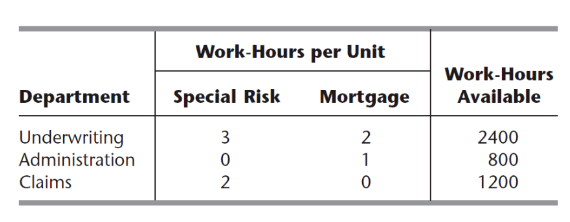



## O.F:
Maximize Z=5x1+2x2



---
# Subjected to:


3x1+2x2<=2400

x2<=800

2x1<=1200

In [3]:
obj=[-5,-2] # coefficient for x1 and x2, respectively (!!!pay attention to signs!!!).

# left hand side coefficents in constraints
LHS_ineq=[[3,2], # 1
          [0,1], # 2
          [2,0]] # 3

# right hand side coefficents in constraints
RHS_ineq=[2400,   # 1
          800,  # 2
          1200]  # 3

opt = linprog(c=obj, A_ub=LHS_ineq, b_ub=RHS_ineq,
              method="revised simplex")
print(opt)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -3600.0
       x: [ 6.000e+02  3.000e+02]
     nit: 2


<ipython-input-3-c7841726c412>:13: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=LHS_ineq, b_ub=RHS_ineq,


# Example 3

x1: Concrete element type 1  ---> each element generates 60$ profit

x2: Concrete element type 2  ---> each element generates 40$ profit

2 and 3 units of raw material needed to produce one element of type 1 and 2, respectively

4 and 2 units of time needed to produce one element of type 1 and 2, respectively

100 units of raw materials and 120 units of time are available

how many units of each element should be produced to maximize the profit?

In [4]:
# objective function: Maximize Z=60x1+40x2
obj=[-60 , -40]

# subjected to:  2x1+3x2<=100
#                4x1+2x2 <=120
LHS_ineq=[[2,3],
          [4,2]]

RHS_ineq=[100,
          120]

#solver
opt = linprog(c=obj, A_ub=LHS_ineq, b_ub=RHS_ineq,
              method="revised simplex")
print(opt)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -2000.0
       x: [ 2.000e+01  2.000e+01]
     nit: 2


<ipython-input-4-4301c53b52cb>:13: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=LHS_ineq, b_ub=RHS_ineq,


#  Example 4

A building contractor produces two types of houses: detached and semidetached. The customer is offered several choices of architectural design and layout for each type. The proportion of each type of design sold in the past is shown in the following table. The profit on a detached house and a semidetached house is $1,000 and $800, respectively

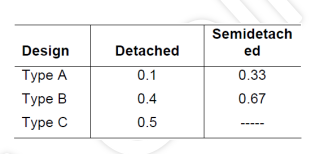



The builder has the capacity to build 400 houses per year. However, an estate of housing will not be allowed to contain more than 75% of the total housing as detached.
Furthermore, because of the limited supply of bricks available for type B designs, a 200-house limit with this design is imposed. Use Excel to develop a model of this problem and then use SOLVER to determine how many detached and semidetached houses should be constructed in order to maximize profits. State the optimum profit

In [ ]:
# objective function: Maximize Z=1000x1+800x2
obj=[-1000 , -800]

# subjected to:  x1+x2<=400
#                x1 <=0.75(x1+x2)
#                0.4x1+0.67x2<=200
LHS_ineq=[[1,1],
          [0.25,-0.75],
          [0.4,0.67]]

RHS_ineq=[400,
          0,
          200]

#solver
opt = linprog(c=obj, A_ub=LHS_ineq, b_ub=RHS_ineq,
              method="revised simplex")
print(opt)

     con: array([], dtype=float64)
     fun: -380000.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.,  0., 13.])
  status: 0
 success: True
       x: array([300., 100.])


# Example 5

***more than 2 variables***

a factory produces four different products, and that the daily produced amount of the first product is x₁, the amount produced of the second product is x₂, and so on. The goal is to determine the profit-maximizing daily production amount for each product, bearing in mind the following conditions:


---


The profit per unit of product is $20, $12, $40, and $25 for the first, second, third, and fourth product, respectively.


---


Due to manpower constraints, the total number of units produced per day can’t exceed fifty.


---


For each unit of the first product, three units of the raw material A are consumed. Each unit of the second product requires two units of the raw material A and one unit of the raw material B. Each unit of the third product needs one unit of A and two units of B. Finally, each unit of the fourth product requires three units of B.


---


Due to the transportation and storage constraints, the factory can consume up to one hundred units of the raw material A and ninety units of B per day.


# O.F:
Maximize Z=20x1+12x2+40x3+25x4


---

# Subjected to:
 x1 + x2 +x3 + x4 <=50 (manpower)

3x1 + 2x2 + x3 <=100 (material A)

x2 + 2x3+ 3x4 <=90 (material B)

x1, x2, x3, x4>=0

# Optimization

In [ ]:
obj = [-20, -12, -40, -25]

lhs_ineq = [[1, 1, 1, 1],  # Manpower
            [3, 2, 1, 0],  # Material A
            [0, 1, 2, 3]]  # Material B

rhs_ineq = [ 50,  # Manpower
            100,  # Material A
             90]  # Material B

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              method="revised simplex")

print(opt)


     con: array([], dtype=float64)
     fun: -1900.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 40.,  0.])
  status: 0
 success: True
       x: array([ 5.,  0., 45.,  0.])


# Example 6
***minimization***

# Defining Variables

a pharmaceutical firm is to produce exactly 40 gallons of mixture in which the basic ingredients, x1 and x2, cost $8 per gallon and $15 per gallon, respectively, No more than 12 gallons of x1 can be used, and at least 10 gallons of x2 must be used. The firm wants to minimize cost

x1: amount of the first ingredient (gallon)

x2: amount of the second ingredient (gallon)

Z: total cost


---


# Objective function
 Minimize Z=8x1+15x2



---
# Constraints
x1 <= 12                 

x2 >= 10               

           
X1 , X2 >= 0

In [ ]:
obj=[8,15] # coefficient for x1 and x2

# left hand side coefficents in constraints
LHS_ineq=[[1,0], # 1
          [0,-1]] # 2

# right hand side coefficents in constraints
RHS_ineq=[12,  # 1
          -10]  # 2

opt = linprog(c=obj, A_ub=LHS_ineq, b_ub=RHS_ineq,
              method="revised simplex")

print(opt)


     con: array([], dtype=float64)
     fun: 150.0
 message: 'The solution was determined in presolve as there are no non-trivial constraints.'
     nit: 0
   slack: array([12.,  0.])
  status: 0
 success: True
       x: array([ 0., 10.])


# Assumptions of Linear Programming

**1. Proportionality**

x1: units of first product

x2 units of second product

Objective: Maximize total Profit

Z= 2 x1 + 4 x2 ==> profit: 2 dollars per unit of product one sold and  4 dollars per unit of product two sold

Constraints: time is spent to produce each unit of the first product is 5 hrs., ultimately and time is spent to produce each unit of the second product is at last 3x1^0.5.

<ipython-input-10-048c65ace768>:7: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.linspace(-1, 7, 100), 3*(np.linspace(-1, 7, 100))**0.5, color="c")


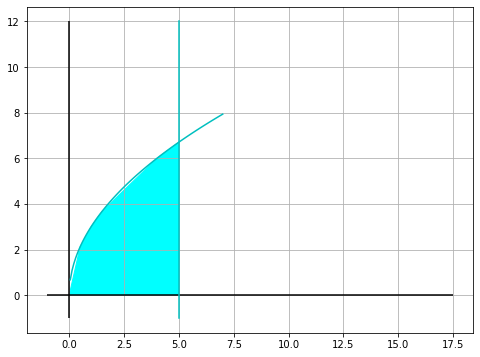

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 7, 100), 3*(np.linspace(-1, 7, 100))**0.5, color="c")
ax.plot([5,5,5],[-1,1,12], color="c")



# Draw the feasible region
feasible_region = Polygon(np.array([[0,0],
                                   [0.5, 3*(0.5**0.5)],
                                   [1,3],
                                   [1.5,3*(1.5**0.5)],
                                   [4,3*(4**0.5)],
                                   [5,3*(5**0.5)],
                                   [5,0]]),
                       color="cyan")
ax.add_patch(feasible_region)




plt.show()

**2.Additivity**

x1: units of first product

x2 units of second product

Objective: Maximize total Profit

Z= 2 x1 + 3 (x1 x2) ==> profit: 2 dollars per unit of product one sold and  4x1 dollars per unit of product two  sold

Constraints: time is spent to produce each unit of the first product is 5 hrs., ultimately and time is spent to produce each unit of the second product is at last 3

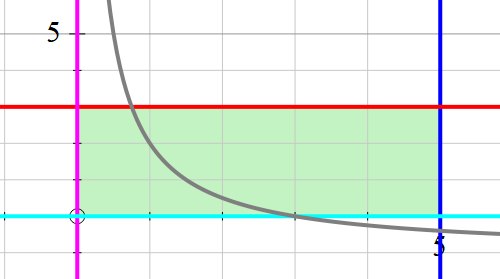

**3.Divisibility**

existence of an integer decision variable

**4.Certainty**

The parameters of the model should be constant

# Example

minimize
Z=
x
1
x
4
(
x
1
+
x
2
+
x
3
)
+
x
3

subjected to:


x
1
x
2
x
3
x
4
≥
25

x
1^2
+
x
2^2
+
x
3^2
+
x
4^2
=
40

1
≤
x
1
,
x
2
,
x
3
,
x
4
≤
5

In [ ]:
import numpy as np
from scipy.optimize import minimize
# x is a list of input variables
# defining objective function
def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

# defining constraints
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

# initial guesses for input variables
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# show initial objective
print('Initial SSE Objective: ' + str(objective(x0)))

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\  # one of the different nonlinear optimization solvers
                    bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final SSE Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))


Initial SSE Objective: 16.0
Final SSE Objective: 17.01401724563517
Solution
x1 = 1.0
x2 = 4.742996096883977
x3 = 3.8211546234095715
x4 = 1.379407645075325


# Exaple 2

 min      x1^2 + x2^2

s.t.

-x1 ≤ -0.5

-x1 - x2 + 1 ≤ 0

-x1^2 - x2^2 + 1 ≤ 0

-9*x1^2 - x2^2 + 9 ≤ 0

-x1^2 - x2 ≤ 0

x1 - x2^2 ≤ 0




In [ ]:
!pip install numdifftools
from scipy.optimize import minimize
from numdifftools import Jacobian
import time

print('\nSOLVING USING SCIPY\n')

# Objective function
fun = lambda x: x[0]**2 + x[1]**2

# Jacobian
fun_Jac = lambda x: Jacobian(lambda x: fun(x))(x).ravel()

# constraints
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 0.5},
        {'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 1.},
        {'type': 'ineq', 'fun': lambda x: x[0]**2 + x[1]**2 - 1.},
        {'type': 'ineq', 'fun': lambda x: 9*x[0] + x[1] - 9.},
        {'type': 'ineq', 'fun': lambda x: x[0]**2 - x[1]},
        {'type': 'ineq', 'fun': lambda x: -x[0] + x[1]**2}
        )


# bounds, if any, e.g. x1 and x2 have to be positive
bnds = ((None, None), (None, None))
bnds = ((None, None), )*2

# initial guess
x0 = (10,10) # feasible initian point
# x0 = (0,0) # non-feasible initian point

# Method SLSQP uses Sequential Least SQuares Programming to minimize a function
# of several variables with any combination of bounds, equality and inequality constraints.

start_time = time.time()*1000
res = minimize(fun, x0, method='SLSQP', bounds=bnds, constraints=cons)
end_time = time.time()*1000
print(res)
print("optimal value p*", res.fun)
print("optimal var: x1 = ", res.x[0], " x2 = ", res.x[1])
print("exec time (ms): ", end_time - start_time)

start_time = time.time()*1000
res2 = minimize(fun, x0, method='SLSQP', bounds=bnds, constraints=cons,jac=fun_Jac)
end_time = time.time()*1000
print('\n',res2)
print("JAC: optimal value p*", res2.fun)
print("JAC: optimal var: x1 = ", res2.x[0], " x2 = ", res2.x[1])
print("exec time (ms): ", end_time - start_time)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 3.9 MB/s eta 0:00:00

SOLVING USING SCIPY

     fun: 2.0000000101998934
     jac: array([2., 2.])
 message: 'Optimization terminated successfully'
    nfev: 73
     nit: 15
    njev: 14
  status: 0
 success: True
       x: array([1., 1.])
optimal value p* 2.0000000101998934
optimal var: x1 =  1.000000002549913  x2 =  1.0000000025500337
exec time (ms):  16.795654296875

      fun: 2.000003952474808
     jac: array([2.0000029, 2.0000029])
 message: 'Optimization terminated successfully'
    nfev: 9
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.00000099, 1.00000099])
JAC: optimal value p* 2.000003952474808
JAC: optimal var: x1 =  1.0000009881124325  x2 =  1.000000988123995
exec time (ms):  61.84521484375
